In [1]:
import os, glob
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
# CONSTANTS!!!

# STEP 1 - Load and visualize data
# dataInputPath = 'data/'
imagePathInput = 'data/' #os.path.join(dataInputPath, 'img/')
# maskPathInput = os.path.join(dataInputPath, 'mask/')

# dataOutputPath = 'data/slices/'
imageSliceOutput = '2D_Images/'#os.path.join(dataOutputPath, 'img/')
# maskSliceOutput = os.path.join(dataOutputPath, 'mask/')

# STEP 2 - Image normalization
HOUNSFIELD_MIN = 0
HOUNSFIELD_MAX = 290
HOUNSFIELD_RANGE = HOUNSFIELD_MAX - HOUNSFIELD_MIN

# STEP 3 - Slicing and saving
SLICE_X = True
SLICE_Y = True
SLICE_Z = False

SLICE_DECIMATE_IDENTIFIER = 3

In [3]:
# Load image and see max min Hounsfield units
imgPath = os.path.join(imagePathInput, 't1_denoised.nii')
img = nib.load(imgPath).get_fdata()
np.min(img), np.max(img), img.shape, type(img)

(0.0, 291.8846301560612, (274, 384, 384), numpy.memmap)

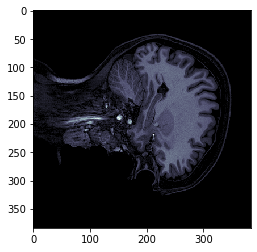

In [6]:
# Show image slice
imgSlice = img[100,:,:]
plt.imshow(imgSlice, cmap='bone')
plt.show()

In [7]:
# Normalize image
def normalizeImageIntensityRange(img):
    img[img < HOUNSFIELD_MIN] = HOUNSFIELD_MIN
    img[img > HOUNSFIELD_MAX] = HOUNSFIELD_MAX
    return (img - HOUNSFIELD_MIN) / HOUNSFIELD_RANGE

nImg = normalizeImageIntensityRange(img)
np.min(nImg), np.max(nImg), nImg.shape, type(nImg)

(0.0, 1.0, (274, 384, 384), numpy.ndarray)

In [8]:
# Save volume slice to file
def saveSlice(img, fname, path):
    img = np.uint8(img * 255)
#     fout = os.path.join(path, f'/{fname}.png')
    cv2.imwrite(fname, img)
#     print(f'[+] Slice saved: {fout}', end='\r')
    
# saveSlice(nImg[:,200,:], 'test', imageSliceOutput)
# saveSlice(mask[20,:,:], 'test', maskSliceOutput)

In [ ]:
# Read, process and save 2D image volumes
for index, filename in enumerate(glob.iglob('data/t1_denoised.nii')):
    img = readImageVolume(filename, True).T
    print(filename, img.shape, np.sum(img.shape), np.min(img), np.max(img))
    numOfSlices = sliceAndSaveVolumeImage(img, 't1'+str(index), imageSliceOutput)
    print(f'\n{filename}, {numOfSlices} slices created \n')